In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
%config InlineBackend.figure_format = 'svg'  # Looks MUCH better than retina
# %config InlineBackend.figure_format = 'retina'

from sklearn import tree

import dtreeviz
from dtreeviz import decision_boundaries


### Load the Data set
df = pd.read_csv("diabetes.csv")

In [72]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [73]:
df = df.loc[df['BMI'] > 0]
df = df.loc[df['BloodPressure'] > 0]
df = df.loc[df['Glucose'] > 0]

In [74]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [75]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Accuracy 0.7931
Precision 0.6512
Recall 0.6512
F1 0.6512


[Text(0.5, 0.875, 'Glucose <= 127.5\nentropy = 0.939\nsamples = 579\nvalue = [373, 206]\nclass = No Diabetes'),
 Text(0.25, 0.625, 'BMI <= 26.95\nentropy = 0.721\nsamples = 361\nvalue = [289, 72]\nclass = No Diabetes'),
 Text(0.125, 0.375, 'BMI <= 22.95\nentropy = 0.079\nsamples = 102\nvalue = [101, 1]\nclass = No Diabetes'),
 Text(0.0625, 0.125, 'entropy = 0.196\nsamples = 33\nvalue = [32, 1]\nclass = No Diabetes'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 69\nvalue = [69, 0]\nclass = No Diabetes'),
 Text(0.375, 0.375, 'Glucose <= 101.0\nentropy = 0.847\nsamples = 259\nvalue = [188, 71]\nclass = No Diabetes'),
 Text(0.3125, 0.125, 'entropy = 0.544\nsamples = 104\nvalue = [91, 13]\nclass = No Diabetes'),
 Text(0.4375, 0.125, 'entropy = 0.954\nsamples = 155\nvalue = [97, 58]\nclass = No Diabetes'),
 Text(0.75, 0.625, 'BMI <= 29.95\nentropy = 0.962\nsamples = 218\nvalue = [84, 134]\nclass = Diabetes'),
 Text(0.625, 0.375, 'Glucose <= 151.5\nentropy = 0.913\nsamples = 64\nvalue = [4

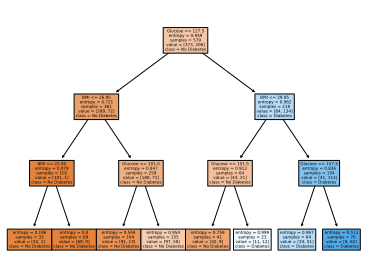

In [116]:
from sklearn.model_selection import train_test_split
X = df[['BloodPressure', 'Insulin', 'Glucose', 'BMI']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the model
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3, min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)

### Qualitative Evaluation
y_preds = clf.predict(X_test)
print("Accuracy %.4f" % accuracy_score(y_test, y_preds))
print("Precision %.4f" % precision_score(y_test, y_preds))
print("Recall %.4f" % recall_score(y_test, y_preds))
print("F1 %.4f" % f1_score(y_test, y_preds))

### Display the current tree
plot_tree(clf, feature_names = list(X.columns), class_names = ['No Diabetes', 'Diabetes'],filled = True)